In [45]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Loading the train data.

df_micro = pd.read_csv('micro_credit.csv')
df_micro.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [47]:
# Checking the shape of the dataset..

df_micro.shape

(209593, 37)

The dataset contains 209593 rows and 37 columnns including the target variable.

'Label' is the target variable where we need to predict whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}.

In [48]:
# Checking the data type of each attribute.

df_micro.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

The whole dataset is in numeric form except 'pcircle' and 'pdate' columns having object datatype.

In [49]:
# Dropping Columns :
#         1.  Unnamed - as it's unnecessary to include in the model.
#         2.  msisdn - as every cx has their unique mobile no. so it won't affect the other attributes in the dataset.

df_micro = df_micro.drop(['Unnamed: 0', 'msisdn'], axis = 1)
df_micro.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10


In [50]:
# Selecting the columns having object data type.

mic_cat = df_micro.select_dtypes(include=object)
mic_cat.columns

Index(['pcircle', 'pdate'], dtype='object')

In [51]:
# Checking the value count of each object type data.

for i in mic_cat.columns:
    print('-----',i,'-----')
    print(mic_cat[i].value_counts())
    print('\n')

----- pcircle -----
UPW    209593
Name: pcircle, dtype: int64


----- pdate -----
2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64




In [52]:
# Dropping Column :
#        'pcircle' i.e. telecom circle is same for every cx so this column or attribute is also not affecting
#                       the other attributes of this dataset.

df_micro = df_micro.drop(['pcircle'], axis = 1)
df_micro.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,2016-07-20
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,2016-08-10


In [53]:
# Checking the shape again after dropping the columns

df_micro.shape

(209593, 34)

Now, only 34 attributes are present in the model including target variable.

######  Checking the missing values

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64


<AxesSubplot:>

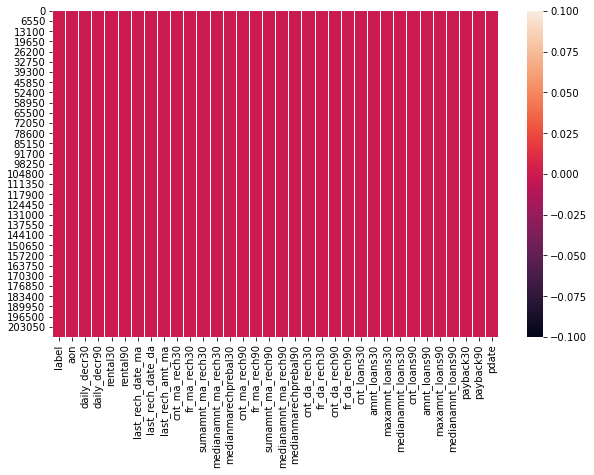

In [54]:
# Checking the null values and visualizing the same using heatmap.

print(df_micro.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(df_micro.isnull())

There are no null vallues present in this dataset.

###### Converting and extracting the object type data

In [55]:
# Converting the 'pdate' column data type into numeric form and extracting the day, month and year from the same.

df_micro['pdate_Day'] = pd.to_datetime(df_micro.pdate, format="%Y/%m/%d").dt.day
df_micro['pdate_Month'] = pd.to_datetime(df_micro.pdate, format="%Y/%m/%d").dt.month
df_micro['pdate_Year'] = pd.to_datetime(df_micro.pdate, format="%Y/%m/%d").dt.year

In [56]:
# Chceking the 'pdate_Year' unique values.

df_micro['pdate_Year'].value_counts()

2016    209593
Name: pdate_Year, dtype: int64

In [57]:
# Dropping the columns :
#           1. 'pdate' -  as this column is extracted into day, month and year.
#           2. pdate_Year - as the datasetis of 1 particular year only i.e. 2016 year.
# And checking the final dataset.

df_micro = df_micro.drop(['pdate', 'pdate_Year'], axis=1)
df_micro.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_Day,pdate_Month
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,20,7
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,10,8


In [58]:
# Again checking the shape of the dataset.

df_micro.shape

(209593, 35)

The final dataset contains 35 columns and 209593 rows.

In [59]:
# Again checking the data type of the attributes in the dataset after the conversion of datatype.

df_micro.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

Now the whole dataset is in numeric form having 2 datatypes float64 and int64.

######  Statistical summary

In [16]:
df_micro.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


The statistical summary of the dataset depicts:-
1. The mean of most of the attributes is greater than its median.
2. There is a bit difference between the values of mean and median of the attributes.
3. The minimum values of attributes except for pdate_Day and pdate_Month is 0 and in negative value.
4. The range of the attributes merely differs from each other as major attributes are of high range and some  ranges from 0-88.
5. The closest std for the attributes to it's mean is ‘medianamnt_loans90=’ - 0.20 and the farthest is ‘sumamnt_ma_rech90’ - 16857.793882. Thus more the std, more wide spread the attribute is.
6. There are  outliers present as per the statistical summary.

###### Correalation

<AxesSubplot:>

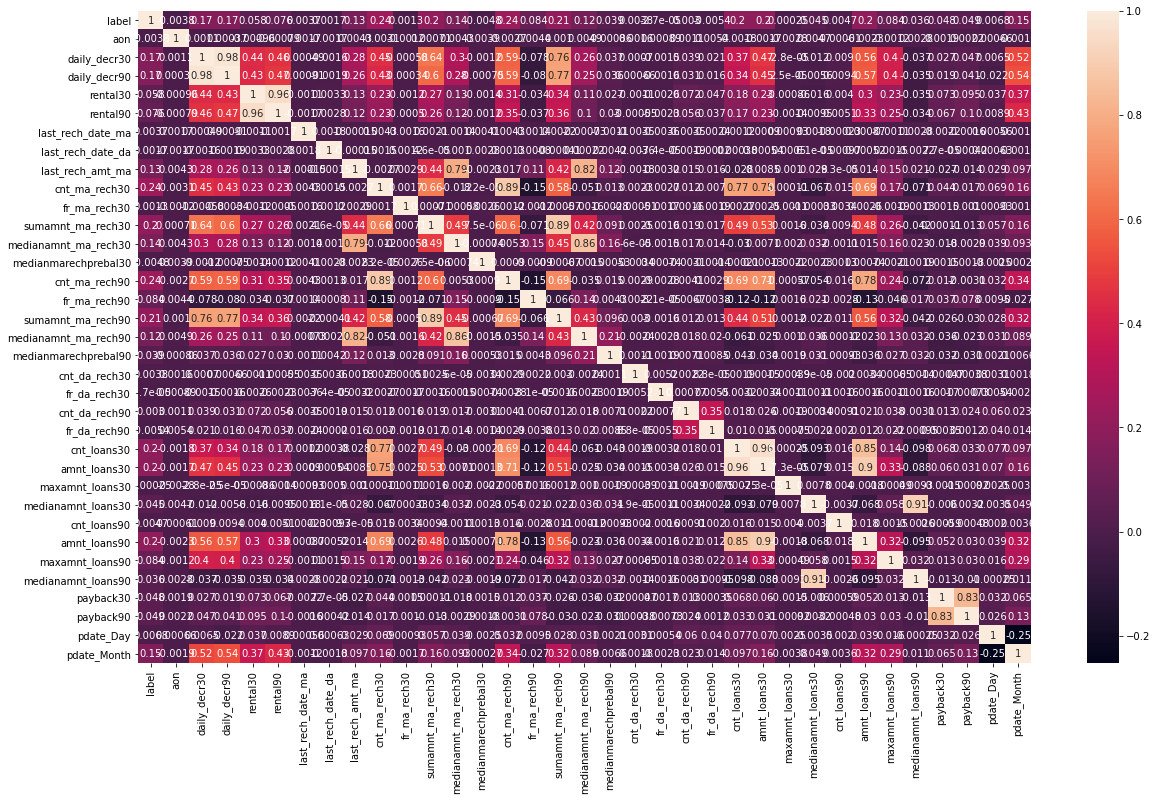

In [17]:
# Correalation Using heatmap

plt.figure(figsize=(20,12))
sns.heatmap(df_micro.corr(), annot=True)

1. The strongest positive correlation between - 'medianamnt_loans30' and 'medianamnt_loans90',
                                              - 'amnt_loans30' and 'amnt_loans90',
                                              - 'amnt_loans30' and 'cnt_loans30', 
                                              - 'rental30' and 'rental90' &
                                              - 'daily_decr30' and 'daily_decr90'
2. The 'cnt_ma_rech90' is strongly negatively correlated with the target variable i.e. 'fr_ma_rech90'.
3. With the target variable 'label' the attributes are nuteral as they are nether highly positively correlated not sytongly negatively correlated.
4. Overall the dataset is not either strongly positive nor negatively correlated.

In [74]:
df_micro.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate_Day', 'pdate_Month'],
      dtype='object')

###### Univariate Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

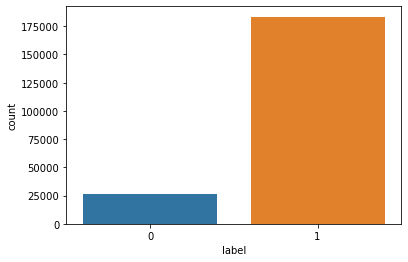

In [18]:
# Checking the count of target variable.

sns.countplot(df_micro['label'], data = df_micro)

The above countplot shows that the count of customers who have paid back the credit amount witthin 5 days is more than the customers who haven't paid back the credit aount within the stipulated timeframe. The difference between the count of both the customers is high as the value of not being defaulter being 1 has approximately 87.5% records. While, the defaulters being represented by 0 has approximately 12.5% recordes. THus, dataset is imbalanced.

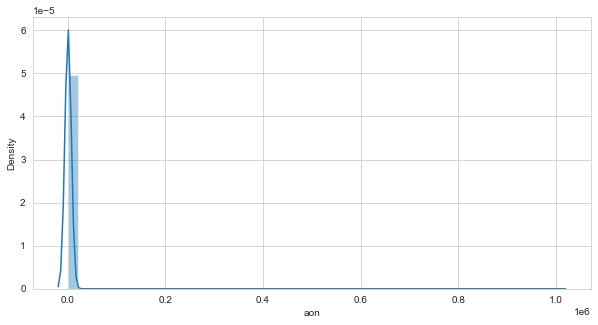

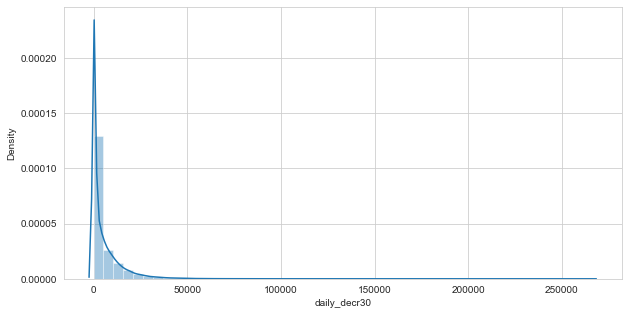

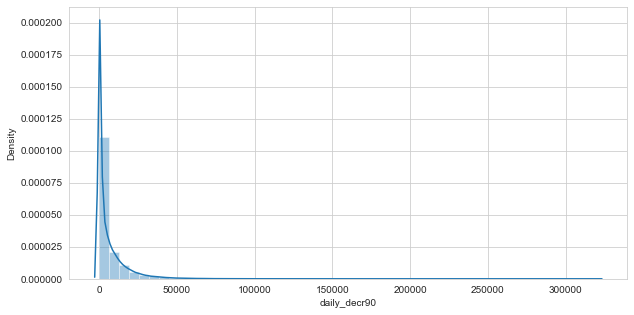

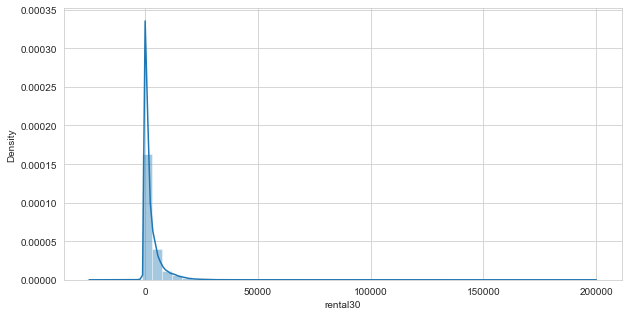

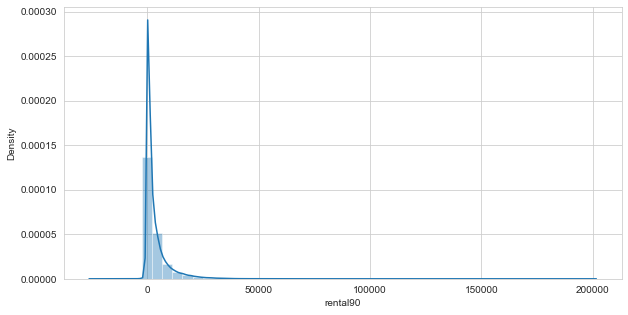

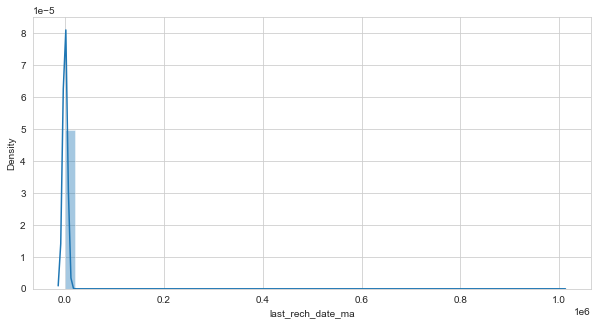

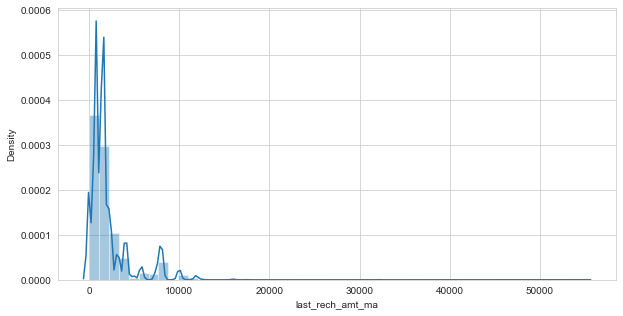

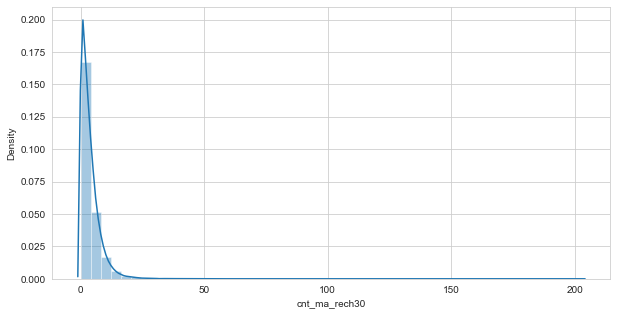

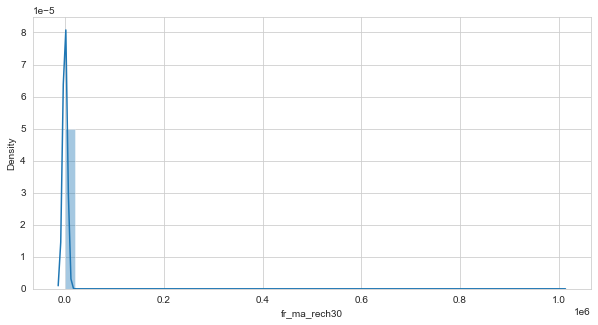

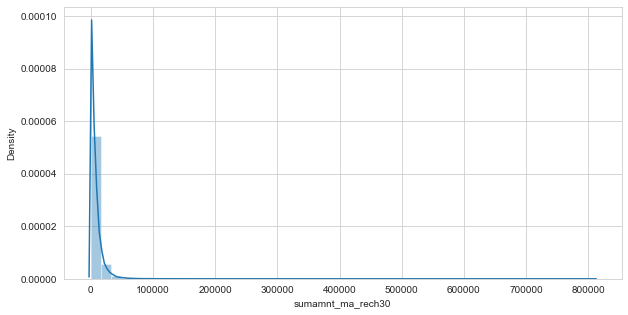

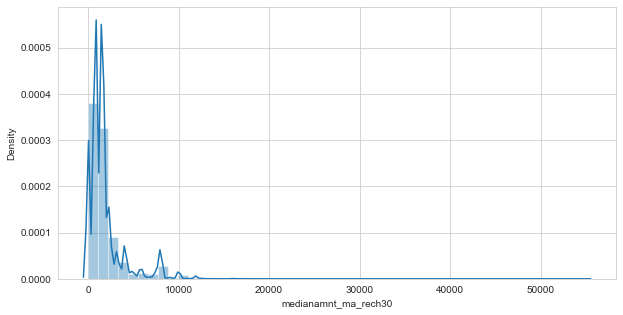

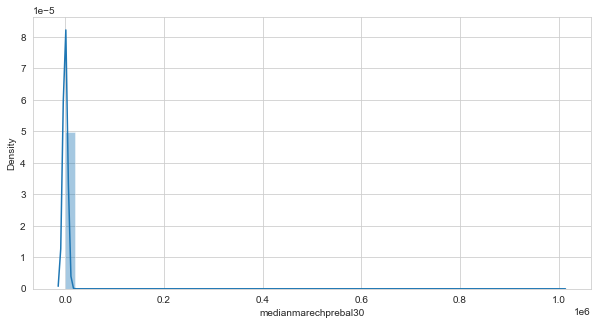

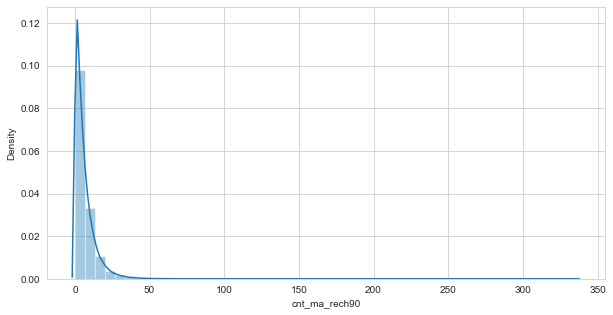

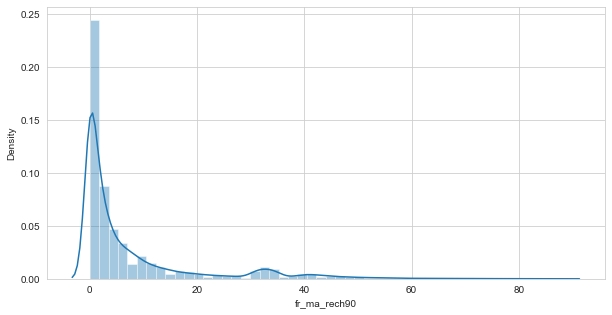

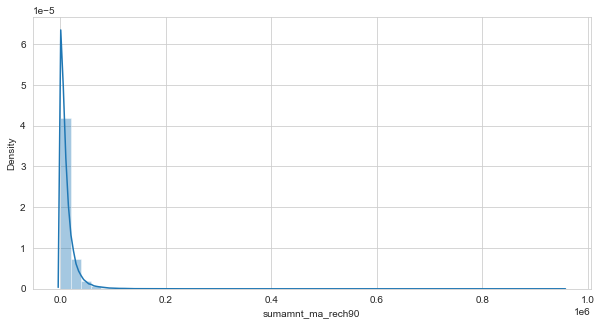

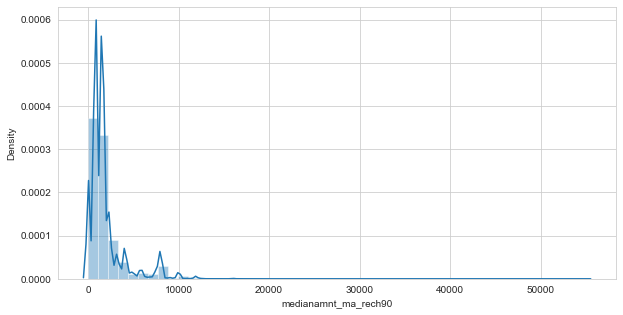

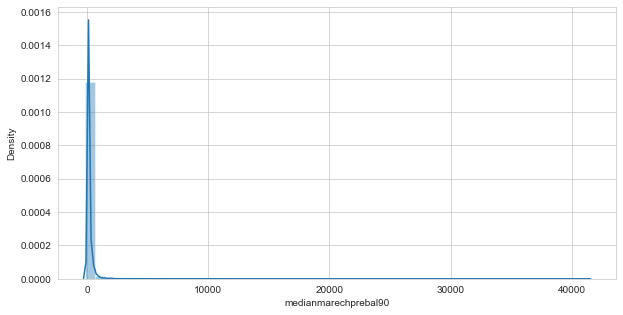

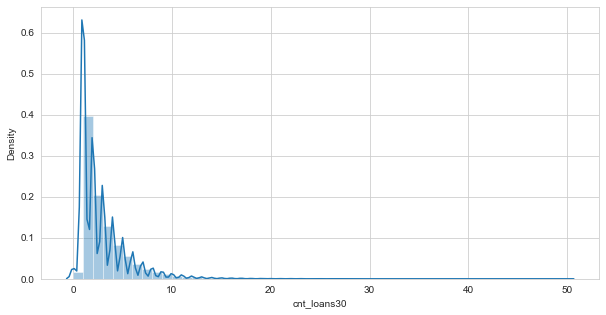

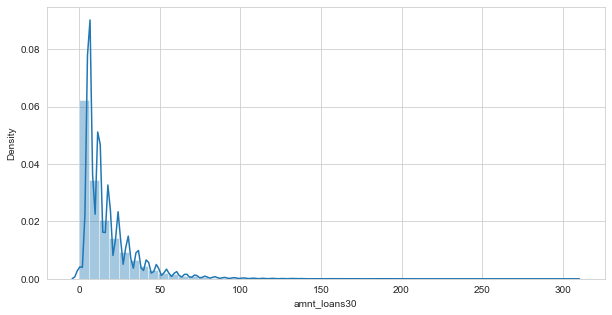

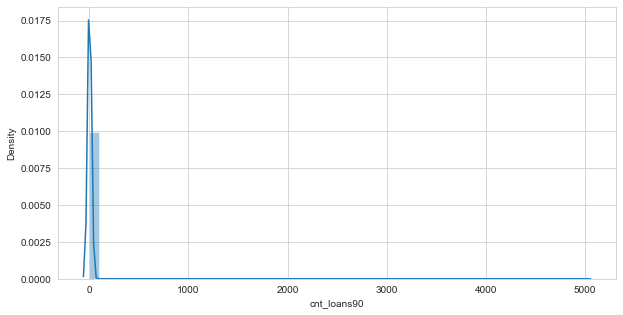

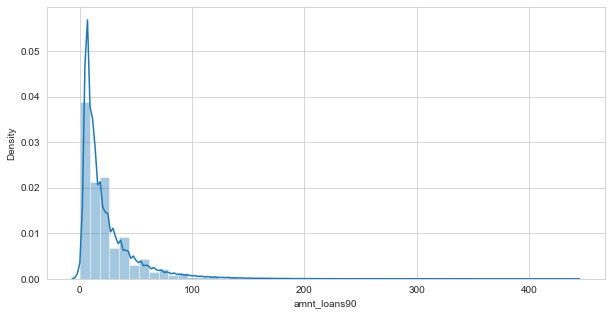

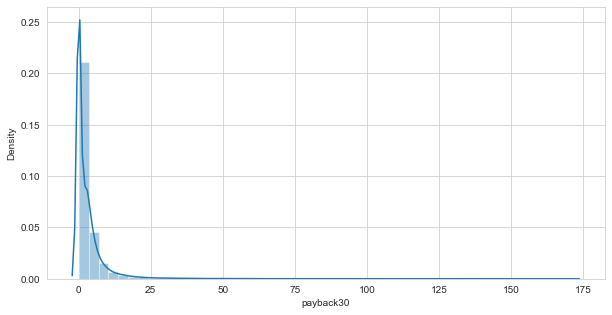

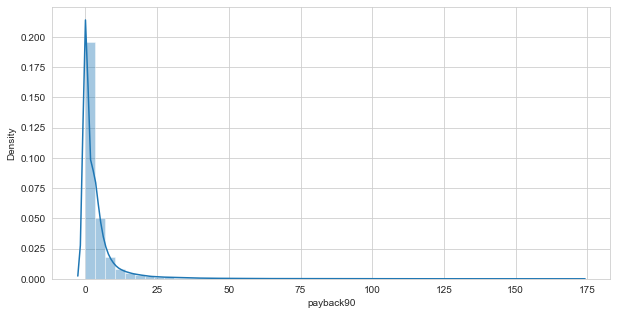

In [19]:
# numeric columns

micro_num = df_micro[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90', 'payback30', 'payback90']]


# Visualizing the distribution of columns using distribution plot.

for i in micro_num.columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5))
    x = sns.distplot(micro_num[i])
    plt.show()

From the above distribution plots of the different attributes of data represents that the whole dataset is positively skewed which needs to be treated.

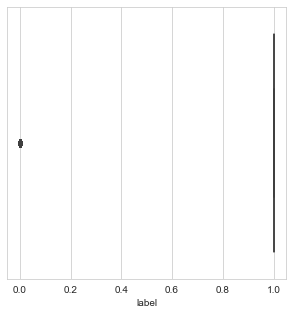

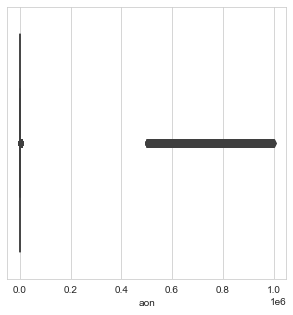

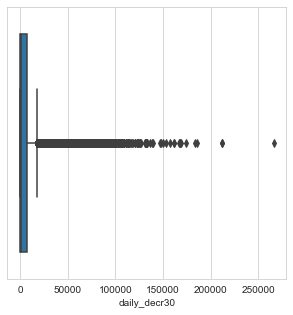

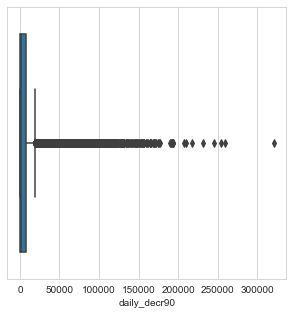

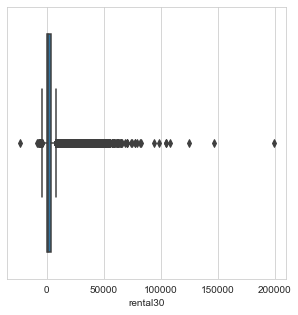

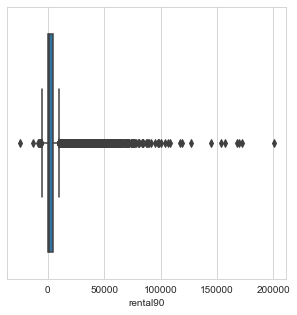

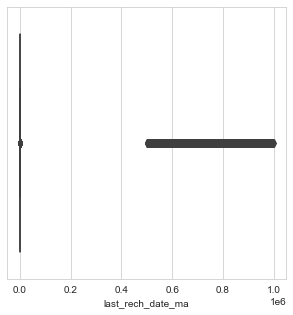

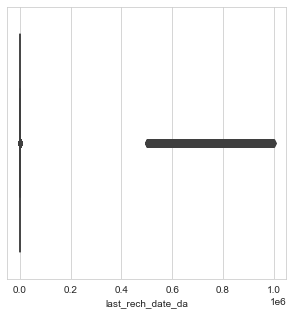

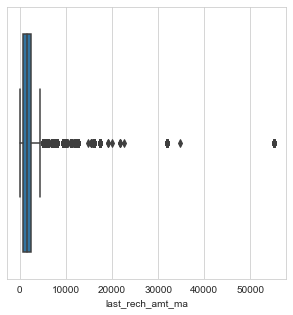

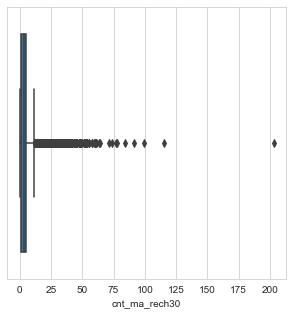

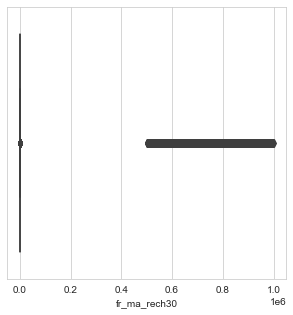

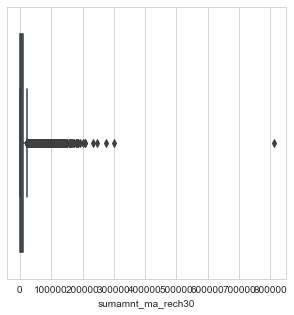

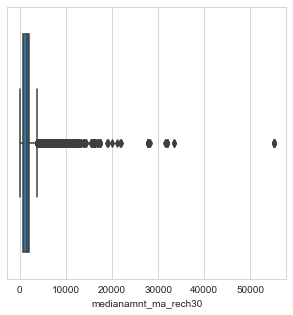

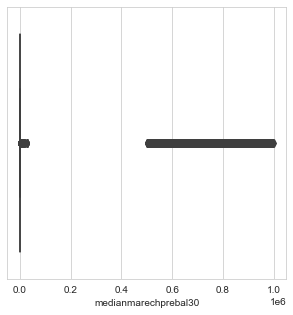

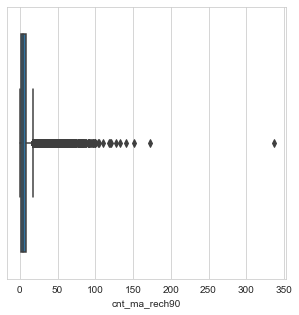

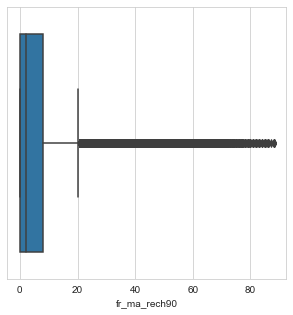

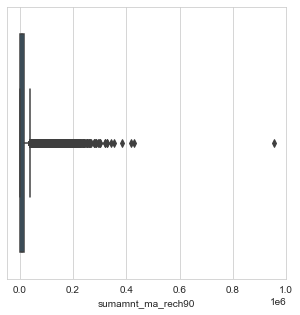

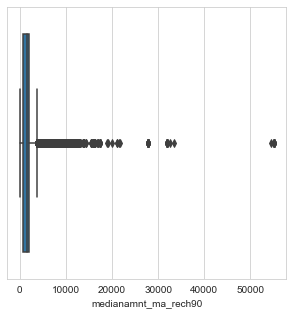

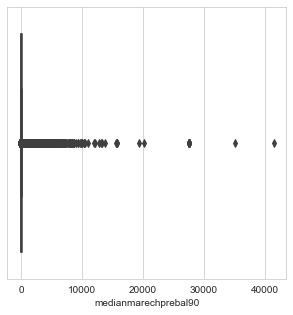

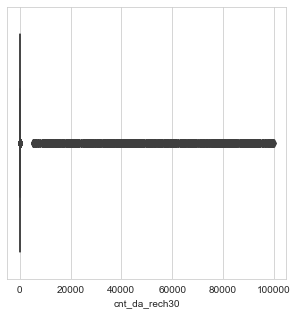

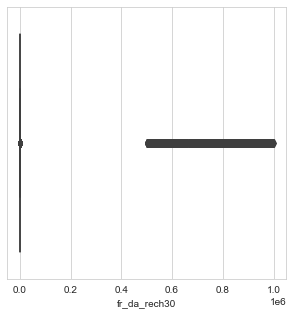

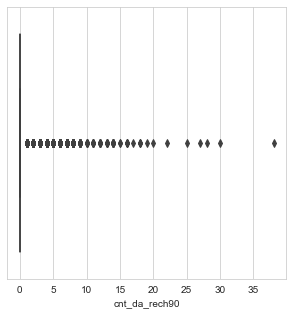

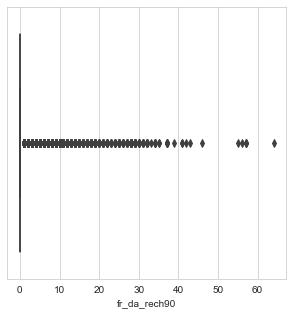

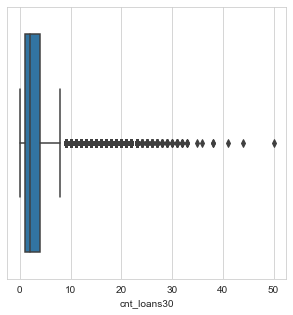

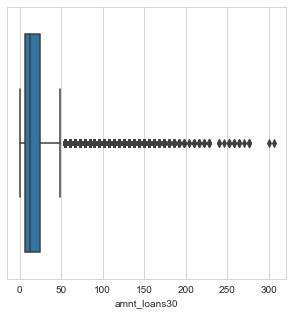

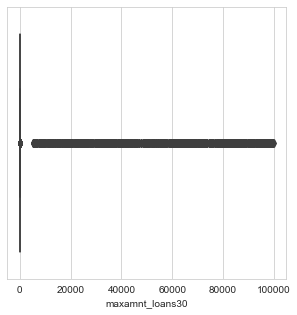

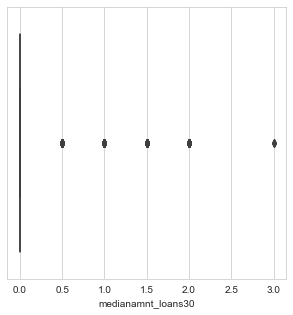

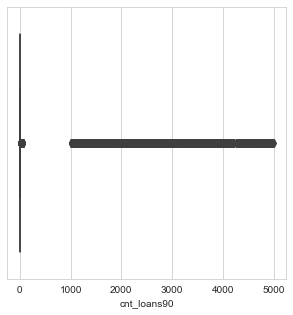

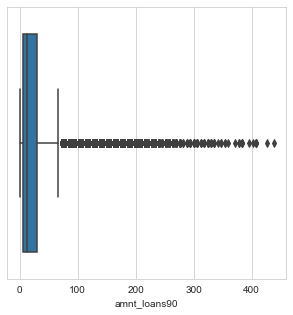

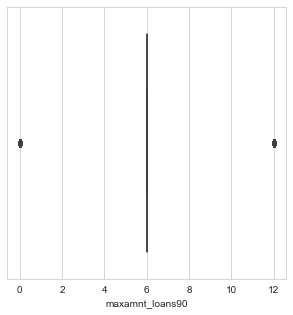

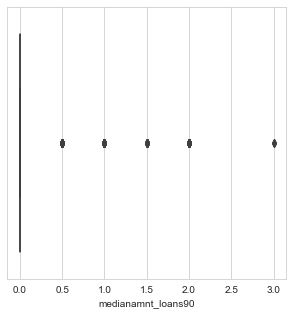

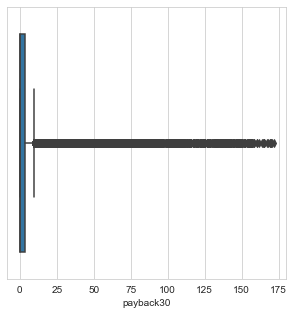

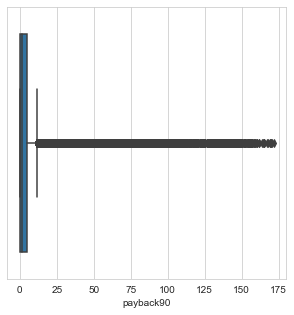

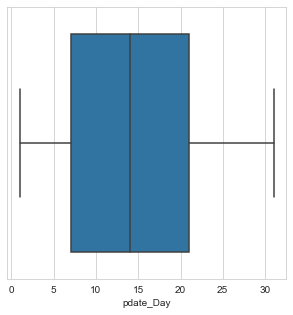

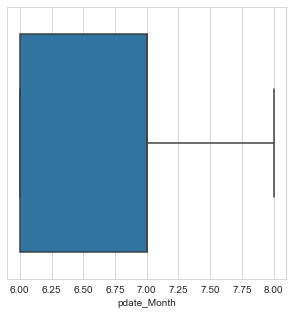

In [20]:
# Plotting the outliers.

for i in df_micro.columns:
    plt.figure(figsize=(5,5))
    x = sns.boxplot(df_micro[i], data=df_micro, orient='v')
    plt.show()

Except for pdate_daya nd pdate_month the hwole dataset contains outliers. 'maxamnt_loans30', 'payback30' and 'payback90' have the higher number of outliers as compared to the other attribbutes.

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='count'>

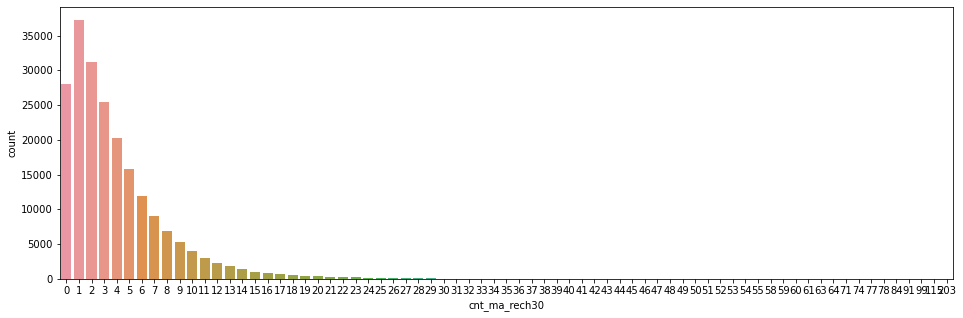

In [16]:
# Visualizing the count of Number of times main account got recharged in last 30 days.

plt.figure(figsize=(16,5))
sns.countplot(df_micro['cnt_ma_rech30'], data = df_micro)

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='count'>

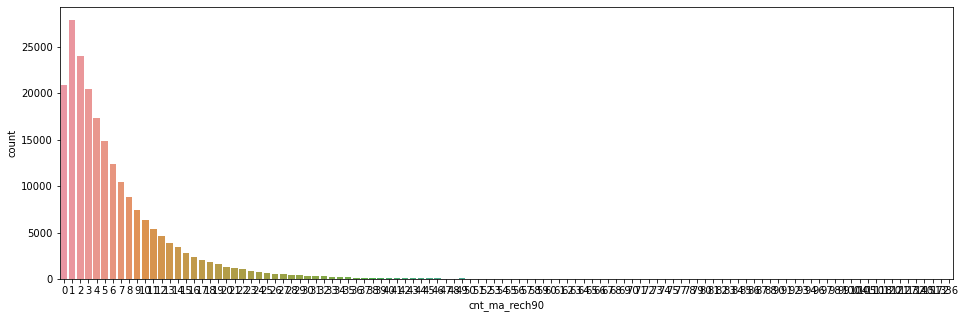

In [17]:
# Visualizing the count of Number of times main account got recharged in last 90 days.

plt.figure(figsize=(16,5))
sns.countplot(df_micro['cnt_ma_rech90'], data = df_micro)

From above,in both 'cnt_ma_rech30' and 'cnt_ma_rech90' maximum only one time the main account got recharged in last 30 days followed by the 2 times. As the number increases the the slope or the account to be recharged no. of times decreases and at a point no recharge is made. 

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='count'>

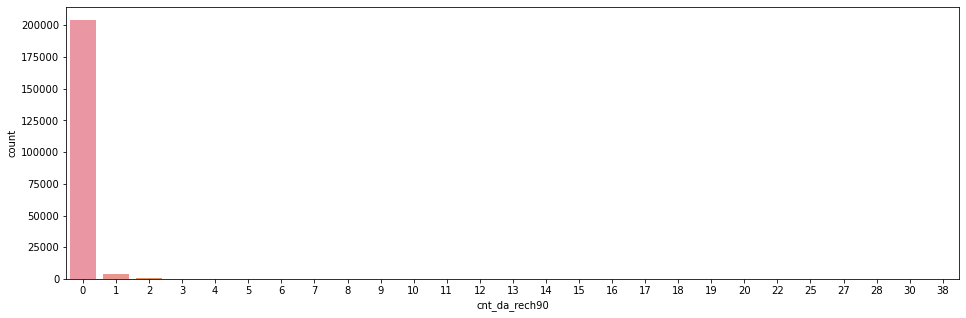

In [18]:
#  Visualizing the count of Number of times data account got recharged in last 90 days

plt.figure(figsize=(16,5))
sns.countplot(df_micro['cnt_da_rech90'], data = df_micro)

The data account in last 90 days majorily dosen't got recharged.

<AxesSubplot:xlabel='cnt_loans30', ylabel='count'>

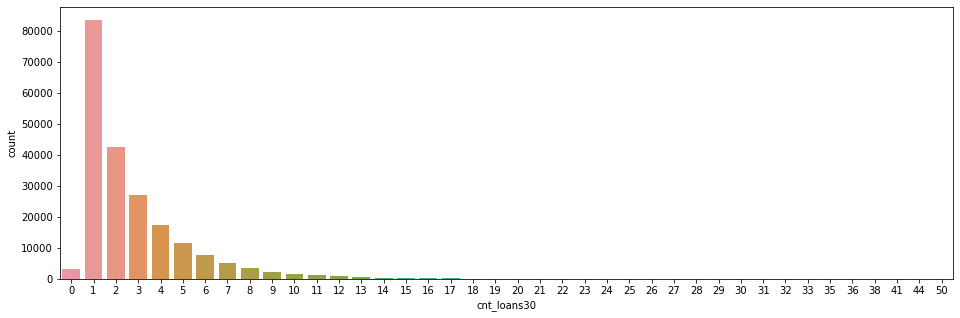

In [19]:
#  Visualizing the count of Number of loans taken by user in last 30 days.
plt.figure(figsize=(16,5))
sns.countplot(df_micro['cnt_loans30'], data = df_micro)

From above, the users have taken loan majorily 1 time in the last 30 days followed by 2 times. here, a indirect propotionality can be seen as the number increases, the number of loans users taken decreases.

###### Bivariate Analysis

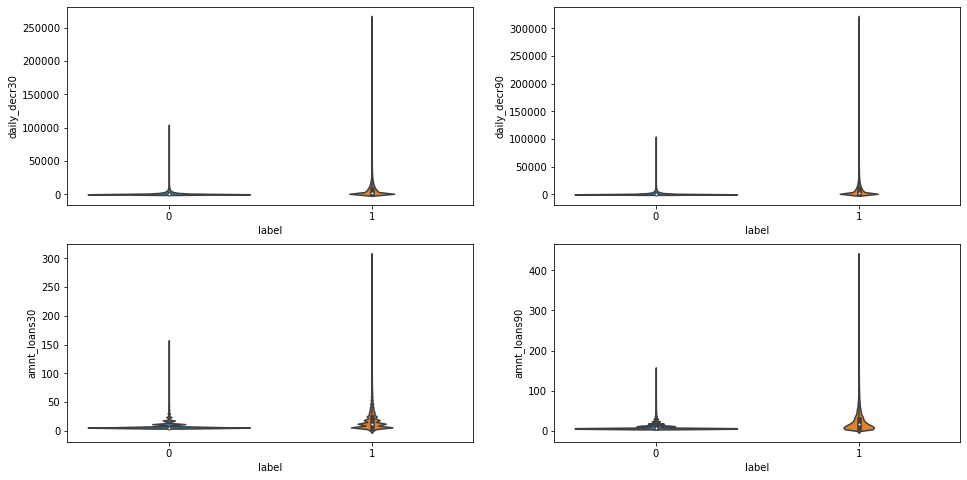

In [20]:
# This Violin plot show how daily_decr30, daily_decr90,amnt_loans30, amnt_loans90 with respect to the customers being defaulter and not.

plt.figure(figsize= (16,8))
plt.subplot(2,2,1)
sns.violinplot(x = 'label', y = 'daily_decr30', data = df_micro);
plt.subplot(2,2,2)
sns.violinplot(x = 'label', y = 'daily_decr90', data = df_micro);
plt.subplot(2,2,3)
sns.violinplot(x = 'label', y = 'amnt_loans30', data = df_micro);
plt.subplot(2,2,4)
sns.violinplot(x = 'label', y = 'amnt_loans90', data = df_micro);

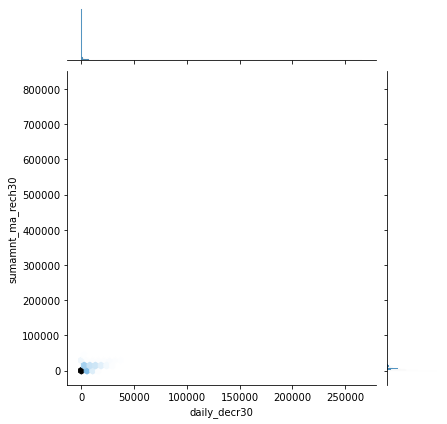

In [21]:
sns.jointplot(x='daily_decr30', y='sumamnt_ma_rech30', data = df_micro, kind='hex')

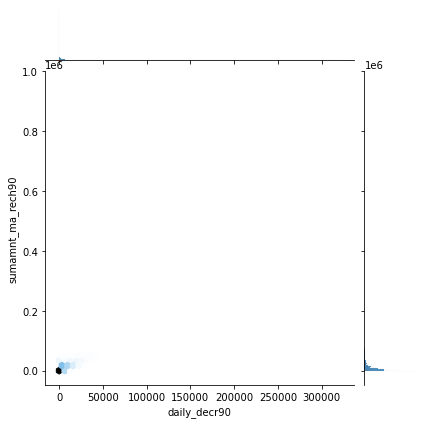

In [22]:
sns.jointplot(x="daily_decr90", y="sumamnt_ma_rech90",data=df_micro, kind='hex') 

The above two jointplot visualize the relation between Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) and over last 90 days (in Indonesian Rupiah)  AND Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) and over last 90 days (in Indonesian Rupiah). Both shows that the value being 0.

<AxesSubplot:xlabel='daily_decr30', ylabel='sumamnt_ma_rech30'>

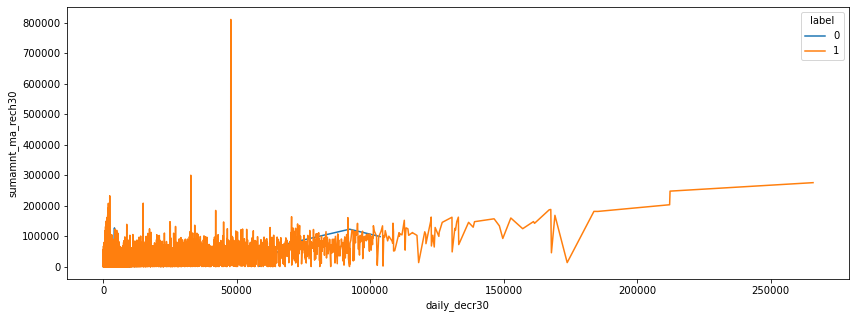

In [23]:
plt.figure(figsize=(14,5))
sns.lineplot(x="daily_decr30", y="sumamnt_ma_rech30", hue="label",data=df_micro)

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='sumamnt_ma_rech30'>

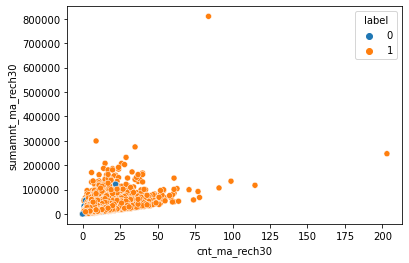

In [24]:
sns.scatterplot(x="cnt_ma_rech30", y="sumamnt_ma_rech30", hue="label",data=df_micro) 

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='sumamnt_ma_rech30'>

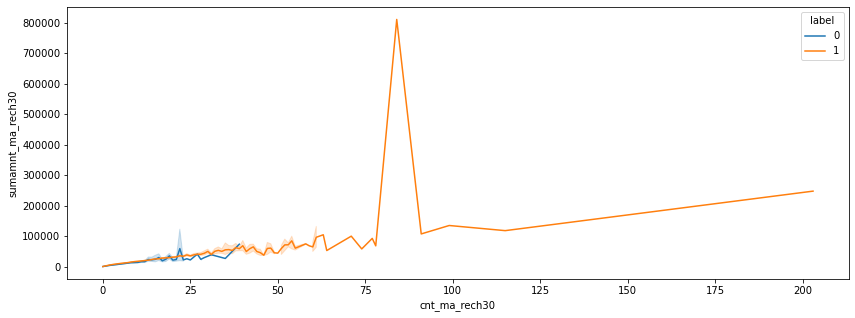

In [26]:
plt.figure(figsize=(14,5))
sns.lineplot(x="cnt_ma_rech30", y="sumamnt_ma_rech30", hue="label",data=df_micro) 

<AxesSubplot:xlabel='daily_decr90', ylabel='sumamnt_ma_rech90'>

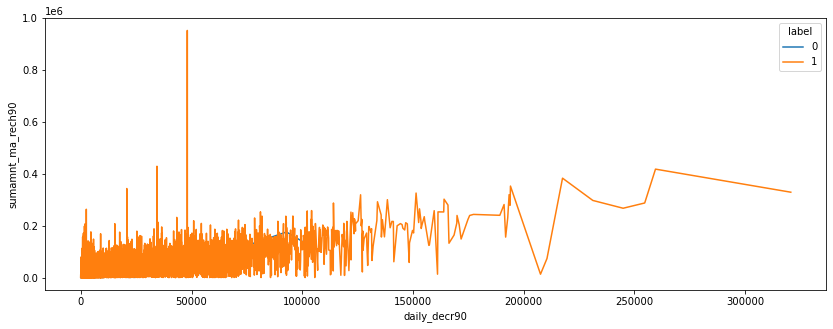

In [28]:
plt.figure(figsize=(14,5))
sns.lineplot(x="daily_decr90", y="sumamnt_ma_rech90",hue="label",data=df_micro) 

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='sumamnt_ma_rech90'>

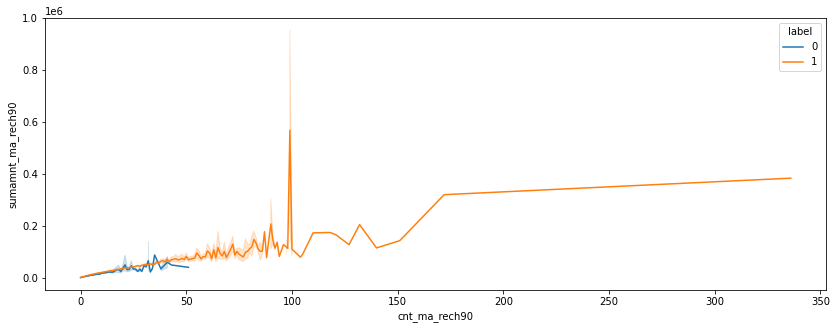

In [31]:
plt.figure(figsize=(14,5))
sns.lineplot(x="cnt_ma_rech90", y="sumamnt_ma_rech90",hue="label",data=df_micro) 

###### Checking the Skewness and Outliers

In [60]:
# Checking the skewness of dataset.

df_micro.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

The data is totally skewd and needs to be treated.

In [61]:
# Checking the outliers and removing the same.

from scipy.stats import zscore

z = np.abs(zscore(df_micro))
print(z.shape)

# Removing the outliers.

df_micro = df_micro.loc[(z<3).all(axis=1)]
print(df_micro.shape)

(209593, 35)
(161465, 35)


48128 rows have been removed as the outliers.

In [62]:
# Checking the skewness after removing the outliers.

df_micro.skew()

label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90             1.695156
maxamnt_loans9

The skewness have been reduced a little after removing the outliers thus still we'll try to reduce it furthur.

In [63]:
# Treating the skewness with sqrt function.

for col in df_micro.columns:
    if df_micro.skew().loc[col]>0.55:
        df_micro[col]=np.sqrt(df_micro[col])

In [64]:
# Again checking the skewness after treament.

df_micro.skew()

label                   -2.090315
aon                      0.337782
daily_decr30             0.834390
daily_decr90             0.904139
rental30                 0.934039
rental90                 0.958644
last_rech_date_ma        1.294016
last_rech_date_da        7.948400
last_rech_amt_ma         0.400265
cnt_ma_rech30           -0.111020
fr_ma_rech30             0.601145
sumamnt_ma_rech30        0.169570
medianamnt_ma_rech30     0.251023
medianmarechprebal30     1.744601
cnt_ma_rech90            0.076171
fr_ma_rech90             0.909459
sumamnt_ma_rech90        0.314699
medianamnt_ma_rech90     0.345523
medianmarechprebal90     1.388946
cnt_da_rech30           48.410201
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              0.778416
amnt_loans30             0.753693
maxamnt_loans30         48.094763
medianamnt_loans30       5.355423
cnt_loans90              0.972697
amnt_loans90             0.958119
maxamnt_loans9

The skewness have been reduced or treated to it's most possible extent.

After reducing and removing the skewness and outliers respectively present in the dataset. The missing values are found which needs to be filled.

In [65]:
# Again checking the null values after removing outliers and treating the skewness.

df_micro.isnull().sum()

label                      0
aon                     1275
daily_decr30            1693
daily_decr90            1693
rental30                4089
rental90                4294
last_rech_date_ma       1052
last_rech_date_da          9
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1300
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1351
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
pdate_Day                  0
pdate_Month   

In [66]:
# Removing the null values using medain of the respective columns containing null values.

df_micro.aon = df_micro.aon.fillna(df_micro['aon'].median())
df_micro.daily_decr30 = df_micro.daily_decr30.fillna(df_micro['daily_decr30'].median())
df_micro.daily_decr90 = df_micro.daily_decr90.fillna(df_micro['daily_decr90'].median())
df_micro.rental30 = df_micro.rental30.fillna(df_micro['rental30'].median())
df_micro.rental90 = df_micro.rental90.fillna(df_micro['rental90'].median())
df_micro.last_rech_date_ma = df_micro.last_rech_date_ma.fillna(df_micro['last_rech_date_ma'].median())
df_micro.last_rech_date_da = df_micro.last_rech_date_da.fillna(df_micro['last_rech_date_da'].median())
df_micro.medianmarechprebal30 = df_micro.medianmarechprebal30.fillna(df_micro['medianmarechprebal30'].median())
df_micro.medianmarechprebal90 = df_micro.medianmarechprebal90.fillna(df_micro['medianmarechprebal90'].median())

In [67]:
# Checking the null values again after filling the same.

df_micro.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate_Day               0
pdate_Month             0
dtype: int64

No null values present now.

###### Separating the input and output variables

In [68]:
X = df_micro.drop(columns=["label"])
y = df_micro[["label"]]

In [69]:
# Checking the shape of the input and target variables respeccftively.

print(X.shape)
print(y.shape)

(161465, 34)
(161465, 1)


In [70]:
# Checking the input variables.

X.head(2)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_Day,pdate_Month
0,16.492423,55.272507,55.363797,14.836779,16.128546,1.414214,0.0,39.230090,1.414214,4.582576,...,2.449490,0.0,1.414214,3.464102,2.449490,0.0,5.385165,5.385165,20,7
1,26.683328,110.099955,110.112443,60.755740,60.755740,4.472136,0.0,76.072334,1.000000,0.000000,...,3.464102,0.0,1.000000,3.464102,3.464102,0.0,0.000000,0.000000,10,8


In [71]:
# Checking the target variables.

y.head(2)

,label
0,0
1,1


###### Scaling the Input variables

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.74838821,  0.26524368,  0.21446338, ...,  3.15126944,
         0.67408949,  0.38851238],
       [ 0.31738542,  1.53679673,  1.4106414 , ..., -0.90458301,
        -0.51442328,  1.77649255],
       [-0.05421767, -0.1494895 , -0.17824138, ..., -0.90458301,
         0.55523822,  1.77649255],
       ...,
       [ 0.85538415,  1.50725272,  1.3886752 , ...,  0.57000752,
         1.74375099,  0.38851238],
       [ 1.87919341,  1.57508164,  1.45484222, ...,  1.53591129,
         1.26834588,  0.38851238],
       [ 1.68514223,  0.53728926,  0.47614937, ..., -0.90458301,
        -0.87097711,  0.38851238]])

###### Training And Testing the Models and evaluating the same as well.

In [73]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix

In [2]:

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Train Accuracy :",clf.score(X_train, y_train))
    print("Test Accuracy :",clf.score(X_test, y_test))
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)

In [3]:
# Creating the instances for the algorithms.

lr = LogisticRegression()
GNB = GaussianNB()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [35]:
models = []
models.append(('LogisticRegression', lr))
models.append(('GaussianNB', GNB))
models.append(('DecisionTreeClassifier', dt))
models.append(('RandomForestClassifier', rfc))

In [36]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, X, y)
    print('\n')
    meanC = cross_val_score(k,  X, y, cv=5, scoring = "accuracy").mean()
    print('Cross validation score :', meanC)
    stdC = cross_val_score(k,  X, y, cv=5, scoring = "accuracy").std()
    print('Standard Deviationin :', stdC)
    print('\n')
    print('\n')

-------- LogisticRegression --------
Maximum Accuracy score is : 0.8734400644102437 achieved at : 55


Train Accuracy : 0.8687486452172297
Test Accuracy : 0.8688879943021708


Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.56      0.31      1687
           1       0.97      0.89      0.93     30606

    accuracy                           0.87     32293
   macro avg       0.59      0.72      0.62     32293
weighted avg       0.93      0.87      0.90     32293



Confusion Matrix :
 [[  942   745]
 [ 3489 27117]]


ROC_AUC_CURVE : 0.7221952074903778


Cross validation score : 0.8684916235716719
Standard Deviationin : 0.0010940237186635613




-------- GaussianNB --------
Maximum Accuracy score is : 0.7358251014151673 achieved at : 73


Train Accuracy : 0.7267828941256619
Test Accuracy : 0.7273093240021057


Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.31      

###### Testing these algorithms by hypertuning the parameters using RandomSearchCV.


In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Hyper parameter tuning of Loogistic Regression

# Creating the hyperparameter grid  
parameters = {"penalty": ['l1', 'l2'], 
              "C": np.logspace(0, 4, 10)
              }
  
# Instantiating RandomizedSearchCV object 
lr_Random = RandomizedSearchCV(lr, parameters, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning
lr_Random.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr_Random.best_params_)) 
print("Best score is {}".format(lr_Random.best_score_)) 

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 3593.813663804626}
Best score is 0.8684606613175431


In [38]:
from scipy.stats import randint

# Hyper parameter tuning of DecisionTree Classifier

# Creating the hyperparameter grid  
param_dist = {"max_depth": [1,2,3,4,5, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 

  
# Instantiating RandomizedSearchCV object 
dt_Random = RandomizedSearchCV(dt, param_dist, cv = 3,verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
dt_Random.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_Random.best_params_)) 
print("Best score is {}".format(dt_Random.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 8}
Best score is 0.8835659857891877


In [39]:
# Hyper parameter tuning of GaussianNB

# Creating the hyperparameter grid  
param = {'var_smoothing': np.logspace(0,-9, num=100)} 

  
# Instantiating RandomizedSearchCV object 
NB_Random = RandomizedSearchCV(GNB, param, cv = 3,verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
NB_Random.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned GaussianNB Parameters: {}".format(NB_Random.best_params_)) 
print("Best score is {}".format(NB_Random.best_score_)) 

Tuned GaussianNB Parameters: {'var_smoothing': 8.111308307896873e-08}
Best score is 0.7274146128332667


In [41]:
# Hyper parameter tuning of RandomForest Classifier

# Creating the hyperparameter grid  
param_RF = {'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [2, 4, None],
              'min_samples_split' : [2, 4, 6],
              'min_samples_leaf' : [2, 4, 6],
              'bootstrap' : [True, False],
              'criterion' : ['entropy', 'gini']}

  
# Instantiating RandomizedSearchCV object 
rf_Random = RandomizedSearchCV(rfc, param_RF, cv = 3,verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
rf_Random.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned RandomForest Parameters: {}".format(rf_Random.best_params_)) 
print("Best score is {}".format(rf_Random.best_score_)) 

Tuned RandomForest Parameters: {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Best score is 0.9167497606555938


In [42]:
# Creating the instances for the algorithms.

lr_rs = LogisticRegression(penalty='l2', C=464.15888336127773)
GNB_rs = GaussianNB(var_smoothing=0.8111308307896871)
#sv = SVC()
dt_rs = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=8, min_samples_leaf=8)
#knn = KNeighborsClassifier()
rf_rs = RandomForestClassifier(n_estimators=90, min_samples_split=4, min_samples_leaf=4, max_features='sqrt',
                               max_depth=None, criterion='gini', bootstrap=True)

In [43]:
models = []
models.append(('LogisticRegression', lr_rs))
models.append(('GaussianNB', GNB_rs))
models.append(('DecisionTreeClassifier', dt_rs))
models.append(('RandomForestClassifier', rf_rs))

In [44]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, X, y)
    meanC = cross_val_score(k,  X, y, cv=5, scoring = "accuracy").mean()
    print('Cross validation score :', meanC)
    stdC = cross_val_score(k,  X, y, cv=5, scoring = "accuracy").std()
    print('Standard Deviationin :', stdC)
    print('\n')
    print('\n')

-------- LogisticRegression --------
Maximum Accuracy score is : 0.8734400644102437 achieved at : 55


Train Accuracy : 0.8687563868330598
Test Accuracy : 0.8690428266187719


Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.56      0.31      1698
           1       0.97      0.89      0.93     30595

    accuracy                           0.87     32293
   macro avg       0.59      0.72      0.62     32293
weighted avg       0.93      0.87      0.90     32293



Confusion Matrix :
 [[  950   748]
 [ 3481 27114]]


ROC_AUC_CURVE : 0.7228524911593406
Cross validation score : 0.8685535564983123
Standard Deviationin : 0.0010756378331088143




-------- GaussianNB --------
Maximum Accuracy score is : 0.746539497723965 achieved at : 73


Train Accuracy : 0.7348419162047503
Test Accuracy : 0.735639302635246


Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.31      0.45

###### Comparing the results of algoritjms with and without hyperparameter tuning.

In [49]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'Accuracy Without HyperParameterTuning': [0.8734400644102437, 0.7358251014151673, 0.8806242839005357, 0.9206329545102654],
    'Accuracy With HyperParameterTuning': [0.8734400644102437 , 0.746539497723965, 0.8929489363019849, 0.9209426191434676]})

results


,Model,Accuracy Without HyperParameterTuning,Accuracy With HyperParameterTuning
0,Logistic Regression,0.873440,0.873440
1,GaussianNB,0.735825,0.746539
2,DecisionTreeClassifier,0.880624,0.892949
3,RandomForestClassifier,0.920633,0.920943


###### Finalizing the model

Before hyperparameter tuning, the accuracy of RandomForest is mere 0.92 and after parameter tuning, we obtained an accuracy of 0.92 itself. Thus, in this dataset with and without hyperparametr tuning the results are merely same, there is no such big difference.
Thus, by comparing all the algorithms tested RANDOMFOREST CLASSIFIER works best as it is giving the higest accuracy among all and hence selected as a modelfor this dataset.

In [50]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rf_rs, 'micro_credit.pkl')

['micro_credit.pkl']